In [1]:





### This is a notebook on image sonification. I am using an image of a mandelbrot set and sonifying it. 
### Processing and playback is shown from 3 different cycle output.

In [2]:
from __future__ import print_function
from __future__ import division
%pylab inline

import IPython


Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.io import wavfile

In [4]:
img = imread('media/mandelbrot2.png')

Complexity of the image should hopefully yield some intersting sounds/waveforms.

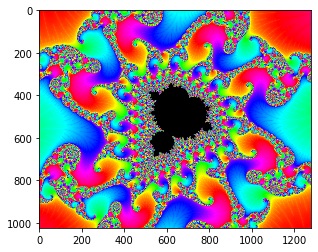

In [5]:
imshow(img)

Plot image starting at X=400 and take the entire column

dtype('float32')

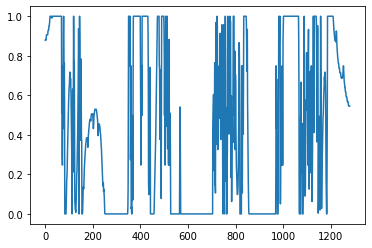

In [6]:
sig = img[400,:, 2]
plot(sig)
sig.dtype

Apply cosine for AM to the selected signal, plot and save it to a wav file.

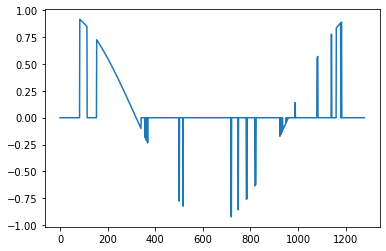

In [7]:
wt = linspace(0, 2*pi, 1280)
signal=cos(wt)
audiooutput = array(((img[400,:,0].astype(int16))))
AMsignal=audiooutput*signal
plot(AMsignal)
wavfile.write('AMsignal.wav', 441000, AMsignal)
IPython.display.Audio (data=AMsignal, filename=None, url=None, embed=True, rate=44100, autoplay=False)

Increase pi (cycle) amount in order to extend view of image. Also frequency is increased for a better audible output.

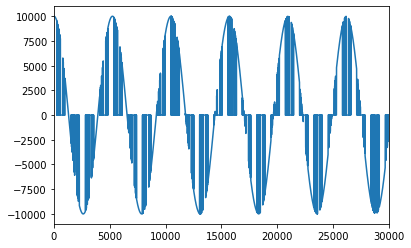

In [8]:
wt = linspace(0, 500 * pi, 1310720)
signal=cos(wt)
audiooutput = array(((img[:,:,0].astype(int16))).flat)
completesignal=audiooutput*signal*10000
plot(completesignal)
xlim(0,30000)
wavfile.write('completesignal.wav', 44100, completesignal)
IPython.display.Audio (data=completesignal, filename=None, url=None, embed=True, rate=44100, autoplay=False)

Same as above only now there are now 5 cycles compared to 500 as in the former output

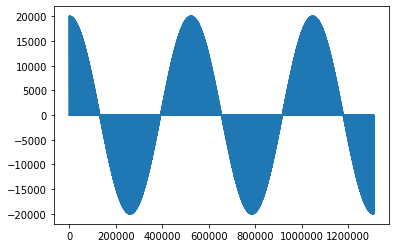

In [9]:
wt = linspace(0, 5 * pi, 1310720)
signal=cos(wt)
audioout = array(((img[:,:,1].astype(int16))).flat)
completesig5=audioout*signal*20000
plot(completesig5)


wavfile.write('completesig5.wav', 44100, completesig5)
IPython.display.Audio (data=completesig5, filename=None, url=None, embed=True, rate=44100, autoplay=False)


### Extra: Create an image of a .wav file. In this case a file that was created in this program

In [10]:
sr, sample = wavfile.read('completesignal.wav')

In [11]:
sample.size

1310720

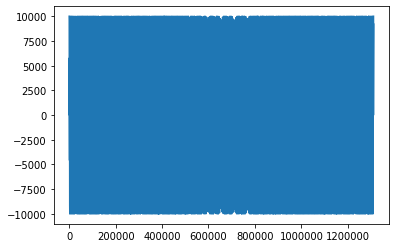

In [12]:
plot(sample);

In [13]:
newimg = sample[:196608].reshape(256,256,3)

In [14]:
newimg.max(), (newimg/100.0).max()

(10000.0, 100.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


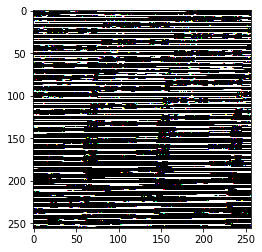

In [15]:
imshow(newimg/100.0);